In [2]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import folium

In [31]:
agg_data = pd.read_csv('data/agg_pure_stats_per_wij_20241212.csv')

In [84]:
postcode_gwb = pd.read_csv('geodata/postcode_gwb.csv', sep=';')

In [85]:
wijk_geodata = pd.read_csv('geodata/wijk_geodata.csv')
buurt_geodata = pd.read_csv('geodata/buurt_geodata.csv')

In [28]:
wijk_geodata["geometry"] = wijk_geodata["geometry_espg28992"].apply(wkt.loads)
buurt_geodata["geometry"] = buurt_geodata["geometry_espg28992"].apply(wkt.loads)

In [34]:
wijk_geodata = gpd.GeoDataFrame(wijk_geodata[['wijk_code', 'geometry']], geometry='geometry', crs="EPSG:28992")

In [35]:
agg_data_buy = agg_data[agg_data['post_type']=='Buy']
agg_data_rent = agg_data[agg_data['post_type']=='Rent']

In [36]:
wijk_geodata = wijk_geodata.set_index('wijk_code').join(agg_data_buy.set_index('wijk_code')).join(agg_data_rent.set_index('wijk_code'), lsuffix='_buy', rsuffix='_rent').reset_index()

In [41]:
wijk_geodata = wijk_geodata.fillna(0)

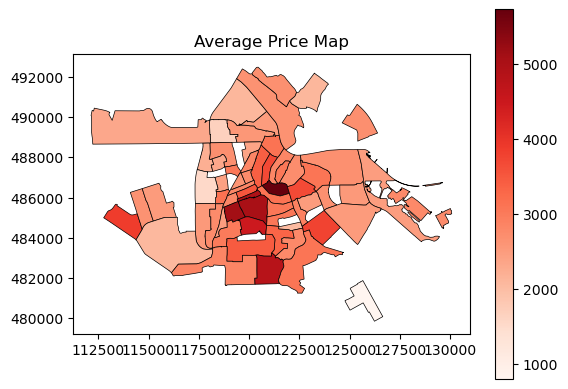

In [44]:
# Plot the GeoDataFrame with the 'avg_price' field determining the color
wijk_geodata[wijk_geodata['number_of_properties_rent']>=5].plot(
    column="avg_price_rent",  # Field to determine the color
    cmap="Reds",         # Colormap (darker red for higher values)
    legend=True,         # Add a legend
    edgecolor="black",   # Add borders to polygons
    linewidth=0.5        # Set the thickness of borders
)

# Add a title and show the plot
plt.title("Average Price Map")
plt.show()

In [40]:
agg_data_rent.sort_values('avg_price')

,wijk_code,post_type,avg_price,avg_surface,avg_rooms,number_of_properties
191,WK0363TC,Rent,803.826087,30.434783,1.130435,23
112,WK0363TF,Rent,850.000000,12.000000,1.000000,1
182,WK0363FM,Rent,1534.473684,52.736842,1.947368,19
137,WK0363EA,Rent,1672.600000,60.600000,2.600000,5
105,WK0363NK,Rent,1825.000000,94.000000,4.000000,1
...,...,...,...,...,...,...
148,WK0363KR,Rent,4800.000000,140.142857,4.428571,7
144,WK0363EV,Rent,4950.000000,175.333333,4.833333,6
199,WK0363KD,Rent,5031.517857,130.678571,3.928571,56
169,WK0363KC,Rent,5112.500000,132.000000,4.000000,12


In [29]:
buurt_geodata

,gemeentecode,wijk_code,buurt_code,kaart_jaar,geometry_espg28992,geometry
0,GM0363,WK0363AA,BU0363AA01,2024,MULTIPOLYGON (((120862.56600000337 489041.6470...,MULTIPOLYGON (((120862.56600000337 489041.6470...
1,GM0363,WK0363AA,BU0363AA02,2024,MULTIPOLYGON (((121224.49100000784 489051.3220...,MULTIPOLYGON (((121224.49100000784 489051.3220...
2,GM0363,WK0363AA,BU0363AA03,2024,MULTIPOLYGON (((121536.2509999983 488898.47700...,MULTIPOLYGON (((121536.2509999983 488898.47700...
3,GM0363,WK0363AA,BU0363AA04,2024,MULTIPOLYGON (((120746.71799999475 488764.2890...,MULTIPOLYGON (((120746.71799999475 488764.2890...
4,GM0363,WK0363AA,BU0363AA05,2024,MULTIPOLYGON (((120785.50200000033 488711.8690...,MULTIPOLYGON (((120785.50200000033 488711.8690...
...,...,...,...,...,...,...
512,GM0363,WK0363TL,BU0363TL04,2024,MULTIPOLYGON (((126940.17499999702 478399.1800...,MULTIPOLYGON (((126940.17499999702 478399.1800...
513,GM0363,WK0363TM,BU0363TM01,2024,MULTIPOLYGON (((127852.40300000086 479360.1100...,MULTIPOLYGON (((127852.40300000086 479360.1100...
514,GM0363,WK0363TM,BU0363TM02,2024,MULTIPOLYGON (((127593.86800000444 478780.7780...,MULTIPOLYGON (((127593.86800000444 478780.7780...
515,GM0363,WK0363TM,BU0363TM03,2024,MULTIPOLYGON (((128052.55799999833 479399.9580...,MULTIPOLYGON (((128052.55799999833 479399.9580...


In [98]:
buurt_to_subdivision = postcode_gwb[['buurt_code', 'stadsdeel', 'stadsdeel_onderverdeling']].drop_duplicates()
buurt_to_stadsdeel = postcode_gwb[['buurt_code', 'stadsdeel']].drop_duplicates()

In [87]:
subdivision_geodata = buurt_geodata.set_index('buurt_code').join(buurt_to_subdivision.set_index('buurt_code')).reset_index()
subdivision_geodata["geometry_espg28992"] = subdivision_geodata["geometry_espg28992"].apply(wkt.loads)
subdivision_geodata = subdivision_geodata[['gemeente_code', 'stadsdeel', 'stadsdeel_onderverdeling', 'geometry_espg28992']]
subdivision_geodata = gpd.GeoDataFrame(subdivision_geodata, geometry='geometry_espg28992', crs="EPSG:28992")
subdivision_geodata = subdivision_geodata.dissolve(by=['gemeente_code','stadsdeel','stadsdeel_onderverdeling']).reset_index()
subdivision_geodata = subdivision_geodata[~subdivision_geodata['stadsdeel'].isin(['Weesp'])]

In [99]:
stadsdeel_geodata = buurt_geodata.set_index('buurt_code').join(buurt_to_stadsdeel.set_index('buurt_code')).reset_index()
stadsdeel_geodata["geometry_espg28992"] = stadsdeel_geodata["geometry_espg28992"].apply(wkt.loads)
stadsdeel_geodata = stadsdeel_geodata[['gemeente_code', 'stadsdeel', 'geometry_espg28992']]
stadsdeel_geodata = gpd.GeoDataFrame(stadsdeel_geodata, geometry='geometry_espg28992', crs="EPSG:28992")
stadsdeel_geodata = stadsdeel_geodata.dissolve(by=['gemeente_code','stadsdeel']).reset_index()
stadsdeel_geodata = stadsdeel_geodata[~stadsdeel_geodata['stadsdeel'].isin(['Weesp'])]

In [109]:
stadsdeel_geodata = pd.read_csv('geodata/stadsdeel_geodata.csv')
stadsdeel_geodata["geometry"] = stadsdeel_geodata["geometry"].apply(wkt.loads)
stadsdeel_geodata = gpd.GeoDataFrame(stadsdeel_geodata[['stadsdeel', 'geometry']], geometry='geometry', crs="EPSG:28992")

In [110]:
stadsdeel_geodata

,stadsdeel,geometry
0,Stadsdeel Centrum,"POLYGON ((121758.789 485689.956, 121742.355 48..."
1,Stadsdeel Centrum,"POLYGON ((120399.937 486481.061, 120397.763 48..."
2,Stadsdeel Nieuw-West,"POLYGON ((115169.978 482958.848, 115153.74 482..."
3,Stadsdeel Nieuw-West,"POLYGON ((115099.097 487404.051, 114597.002 48..."
4,Stadsdeel Nieuw-West,"POLYGON ((114435.66 485198.132, 114344.175 485..."
5,Stadsdeel Nieuw-West,"POLYGON ((116753.022 484277.848, 116736.612 48..."
6,Stadsdeel Noord,"MULTIPOLYGON (((125400.787 488851.394, 125402...."
7,Stadsdeel Noord,"POLYGON ((123018.567 488179.263, 122575.707 48..."
8,Stadsdeel Noord,"POLYGON ((121898.656 490607.581, 121861.099 49..."
9,Stadsdeel Oost,"MULTIPOLYGON (((126587.521 486185.731, 126559...."


In [3]:
amsterdam_bounds = [[52.278, 4.728], [52.431, 5.015]]

# Create a base map
#m = folium.Map(location=[52.3676, 4.9041], zoom_start=12, tiles='CartoDB Positron',  max_bounds=True)  # Centered at Amsterdam (change coordinates as needed)
m = folium.Map(location=[52.3676, 4.9041], zoom_start=12, tiles='CartoDB Positron',  max_bounds=True)
m.fit_bounds(amsterdam_bounds)

def style_function(feature):
    return {
        'fillColor': 'blue',
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.1
    }

# Add GeoJson to the map with hover functionality
folium.GeoJson(
    stadsdeel_geodata,
    name="Regions",
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['stadsdeel'],  # Column to display on hover
        aliases=['Label:'],       # Alias for display
        localize=True,
    )
).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Custom JavaScript to limit zoom levels
map_js = """
<script>
    var map = document.getElementsByClassName('folium-map')[0];
    map._leaflet_map.options.minZoom = 10; // Set minimum zoom level
    map._leaflet_map.options.maxZoom = 14; // Set maximum zoom level
</script>
"""

# Save to an HTML file
m.save("restricted_zoom_map.html")

# Append the custom JavaScript to the saved HTML
with open("restricted_zoom_map.html", "a") as file:
    file.write(map_js)

m

NameError: name 'stadsdeel_geodata' is not defined